In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import plotly.express as px
#pip install matplotlib seaborn scikit-learn xgboost

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

In [4]:
df = pd.read_csv("SaYoPillow.csv", encoding='latin1', delimiter='\t')

In [5]:
df.head()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level,fitness,Unnamed: 7
0,91.840,16.600,89.840,1.840,74.20,3,0.333333,NaN
1,91.552,15.880,89.552,1.552,72.76,3,0.333333,NaN
2,96.000,10.000,95.000,7.000,60.00,1,1.000000,NaN
3,90.768,13.920,88.768,0.768,68.84,3,0.333333,NaN
4,97.872,6.496,96.248,8.248,53.12,1,1.000000,NaN


In [6]:
df = df.drop('Unnamed: 7', axis=1)


In [7]:
df.head()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level,fitness
0,91.840,16.600,89.840,1.840,74.20,3,0.333333
1,91.552,15.880,89.552,1.552,72.76,3,0.333333
2,96.000,10.000,95.000,7.000,60.00,1,1.000000
3,90.768,13.920,88.768,0.768,68.84,3,0.333333
4,97.872,6.496,96.248,8.248,53.12,1,1.000000


In [8]:
df.tail()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level,fitness
625,92.960,10.960,90.960,3.440,62.40,2,0.50
626,98.064,6.752,96.376,8.376,53.44,1,1.00
627,86.880,17.752,84.256,0.000,78.76,4,0.25
628,95.728,9.728,94.592,6.728,59.32,1,1.00
629,93.392,11.392,91.392,4.088,63.48,2,0.50


In [9]:
df.isnull().sum()

body_temperature    0
limb_movement       0
Blood_oxygen        0
Sleeping_hours      0
Heart_rate          0
Stress_level        0
fitness             0
dtype: int64

In [10]:
df.info


<bound method DataFrame.info of      body_temperature  limb_movement  Blood_oxygen  Sleeping_hours  \
0              91.840         16.600        89.840           1.840   
1              91.552         15.880        89.552           1.552   
2              96.000         10.000        95.000           7.000   
3              90.768         13.920        88.768           0.768   
4              97.872          6.496        96.248           8.248   
..                ...            ...           ...             ...   
625            92.960         10.960        90.960           3.440   
626            98.064          6.752        96.376           8.376   
627            86.880         17.752        84.256           0.000   
628            95.728          9.728        94.592           6.728   
629            93.392         11.392        91.392           4.088   

     Heart_rate  Stress_level   fitness  
0         74.20             3  0.333333  
1         72.76             3  0.333333  
2

In [11]:
df.describe()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level,fitness
count,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,92.80000,11.700000,90.900000,3.700000,64.500000,2.200000,0.616667
std,3.52969,4.299629,3.902483,3.054572,9.915277,1.167117,0.323435
min,85.00000,4.000000,82.000000,0.000000,50.000000,1.000000,0.250000
25%,90.50000,8.500000,88.500000,0.500000,56.250000,1.000000,0.333333
50%,93.00000,11.000000,91.000000,3.500000,62.500000,2.000000,0.500000
75%,95.50000,15.750000,94.250000,6.500000,72.500000,3.000000,1.000000
max,99.00000,19.000000,97.000000,9.000000,85.000000,4.000000,1.000000


In [12]:
df.columns

Index(['body_temperature', 'limb_movement', 'Blood_oxygen', 'Sleeping_hours',
       'Heart_rate', 'Stress_level', 'fitness'],
      dtype='object')

In [13]:
df.nunique()

body_temperature    626
limb_movement       626
Blood_oxygen        626
Sleeping_hours      501
Heart_rate          626
Stress_level          4
fitness               4
dtype: int64

In [14]:
object_columns = df.select_dtypes(include='object').columns 
print("Object Columns:") 
print(object_columns) 
print() 
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns 
print("Numerical Columns:") 
print(numerical_columns) 

Object Columns:
Index([], dtype='object')

Numerical Columns:
Index(['body_temperature', 'limb_movement', 'Blood_oxygen', 'Sleeping_hours',
       'Heart_rate', 'Stress_level', 'fitness'],
      dtype='object')


In [15]:
df['fitness'].unique()

array([0.33333333, 1.        , 0.5       , 0.25      ])

In [16]:
df['fitness'].value_counts() 


1.000000    252
0.333333    126
0.500000    126
0.250000    126
Name: fitness, dtype: int64

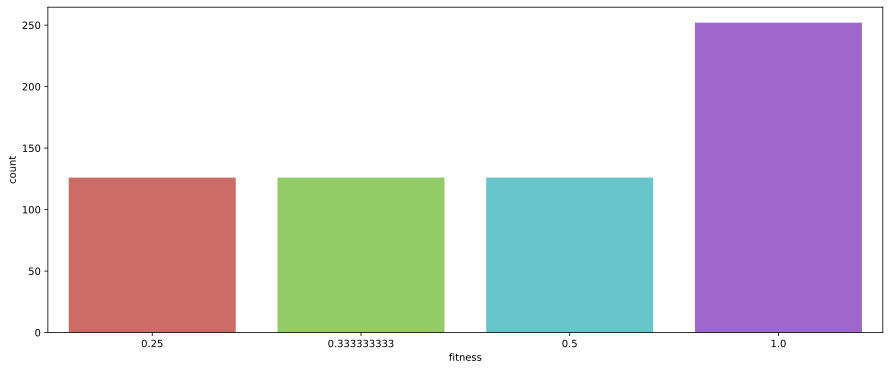

In [17]:
plt.figure(figsize=(15,6)) 
sns.countplot(df['fitness'], data = df, palette = 'hls') 
plt.xticks(rotation = 0) 
plt.show()


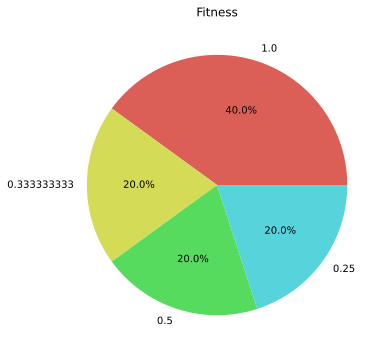

In [18]:
plt.figure(figsize=(15, 6)) 
counts = df['fitness'].value_counts() 
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=sns.color_palette('hls')) 
plt.title('Fitness') 
plt.show()


In [19]:
import plotly.graph_objects as go 


In [20]:
fig = go.Figure(data=[go.Bar(x=df['fitness'].value_counts().index, y=df['fitness'].value_counts())]) 
fig.update_layout( 
 title= 'fitness data', 
 xaxis_title="Categories", 
 yaxis_title="Count" 
 ) 
fig.show()


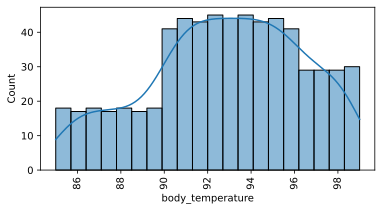

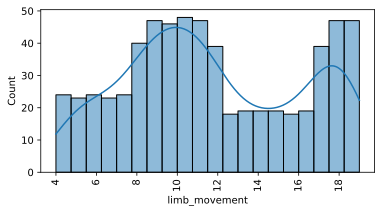

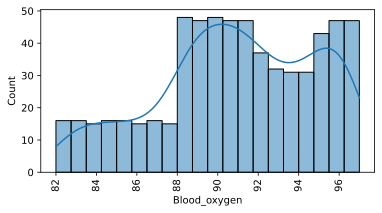

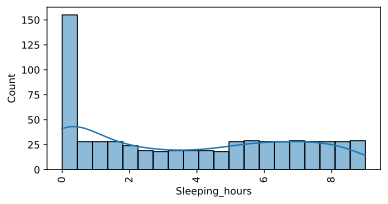

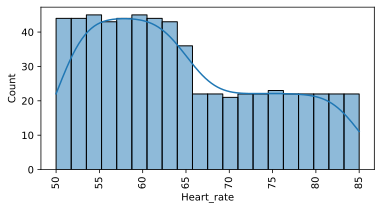

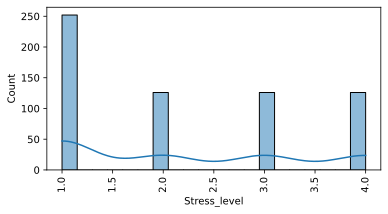

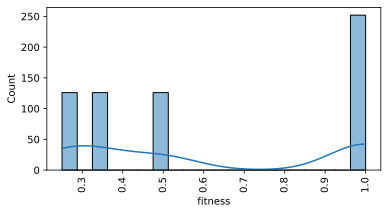

In [21]:
for i in numerical_columns: 
 plt.figure(figsize=(6,3)) 
 sns.histplot(df[i], kde = True, bins = 20, palette = 'hls') 
 plt.xticks(rotation = 90) 
 plt.show() 


In [22]:
df_corr = df.corr()
df_corr 

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level,fitness
body_temperature,1.000000,-0.896412,0.998108,0.954860,-0.889237,-0.938483,0.890496
limb_movement,-0.896412,1.000000,-0.898527,-0.901102,0.991738,0.950061,-0.899087
Blood_oxygen,0.998108,-0.898527,1.000000,0.950189,-0.889210,-0.941192,0.895362
Sleeping_hours,0.954860,-0.901102,0.950189,1.000000,-0.891855,-0.938365,0.947902
Heart_rate,-0.889237,0.991738,-0.889210,-0.891855,1.000000,0.960713,-0.892710
Stress_level,-0.938483,0.950061,-0.941192,-0.938365,0.960713,1.000000,-0.946347
fitness,0.890496,-0.899087,0.895362,0.947902,-0.892710,-0.946347,1.000000


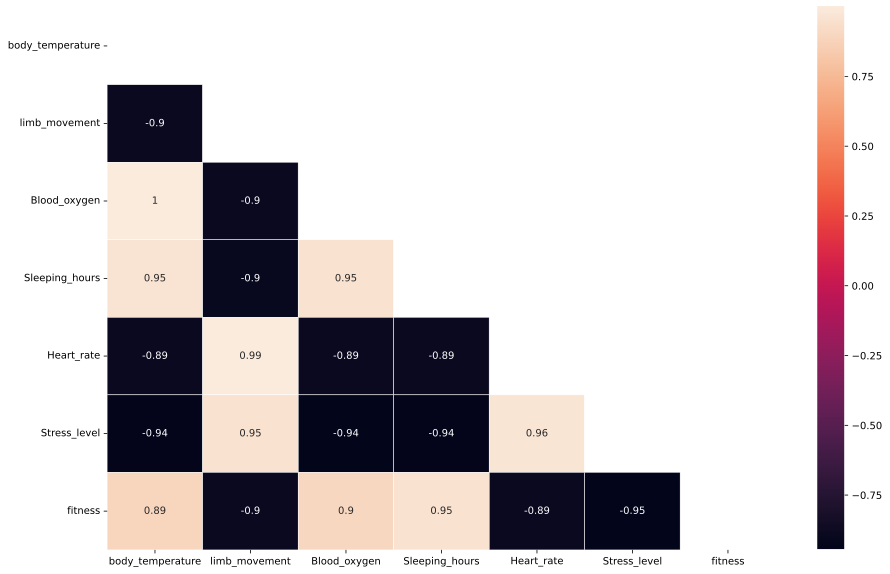

In [23]:
plt.figure(figsize=(15, 10)) 
matrix = np.triu(df_corr) 
sns.heatmap(df_corr, annot=True, linewidth=.5, mask=matrix, cmap="rocket"); 
plt.show()


In [24]:
fig = go.Figure(data=go.Heatmap( 
 z=df_corr.values, 
 x=df_corr.columns, 
 y=df_corr.index, 
 colorscale='Viridis', # Use a valid colorscale name  colorbar=dict(title='Correlation') 
))


In [25]:
fig.update_layout( 
 title='Correlation Heatmap', 
 xaxis=dict(title='X-axis labels'), 
 yaxis=dict(title='Y-axis labels'), 
 width=500, 
 height=500, 
 plot_bgcolor='white' 
) 
fig.show()


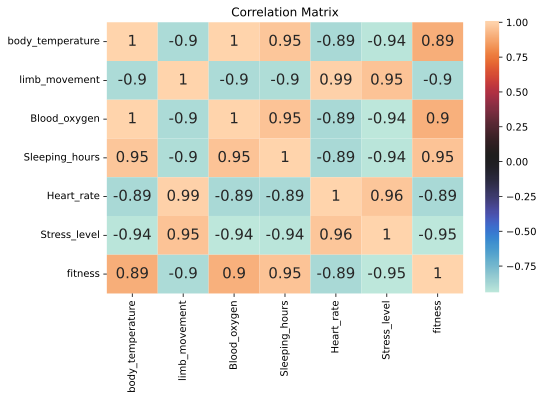

In [26]:
fig, ax = plt.subplots(figsize=(8,5))
cols=['body_temperature', 'limb_movement', 'Blood_oxygen', 'Sleeping_hours',
       'Heart_rate', 'Stress_level', 'fitness']
sns.heatmap(df[cols].corr(), cmap="icefire", annot=True, annot_kws={'size': 15})
plt.title("Correlation Matrix")
plt.show()

In [27]:
df.head()

,body_temperature,limb_movement,Blood_oxygen,Sleeping_hours,Heart_rate,Stress_level,fitness
0,91.840,16.600,89.840,1.840,74.20,3,0.333333
1,91.552,15.880,89.552,1.552,72.76,3,0.333333
2,96.000,10.000,95.000,7.000,60.00,1,1.000000
3,90.768,13.920,88.768,0.768,68.84,3,0.333333
4,97.872,6.496,96.248,8.248,53.12,1,1.000000


In [28]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder 


In [29]:
features_to_scale = ['body_temperature', 'limb_movement', 'Blood_oxygen', 'Sleeping_hours',
       'Heart_rate', 'Stress_level']  
target = 'fitness' 


In [30]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(df[features_to_scale], df[target], test_size=0.25)

In [31]:

# Perform feature scaling for the appropriate features
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features_to_scale] = scaler.fit_transform(X_train_scaled[features_to_scale])
X_test_scaled[features_to_scale] = scaler.transform(X_test_scaled[features_to_scale])


In [32]:
# Create and train the linear regression model 
model_lr = LinearRegression() 
model_lr.fit(X_train_scaled, y_train) 


LinearRegression()

In [33]:
# Make predictions on the test set 
y_pred = model_lr.predict(X_test_scaled) 


In [34]:
# Evaluate the model using root mean squared error (RMSE) 
rmse = mean_squared_error(y_test, y_pred, squared=False) 
print('Root Mean Squared Error:', rmse) 

Root Mean Squared Error: 0.06895445970385193


In [35]:
from sklearn.metrics import r2_score 

# Calculate R-squared score 
r2_lr = r2_score(y_test, y_pred) 
print('R-squared Score:', r2_lr) 

# Calculate Mean Squared Error (MSE) 
mse = mean_squared_error(y_test, y_pred) 
print('Mean Squared Error:', mse) 

R-squared Score: 0.951300560194514
Mean Squared Error: 0.00475471751305014


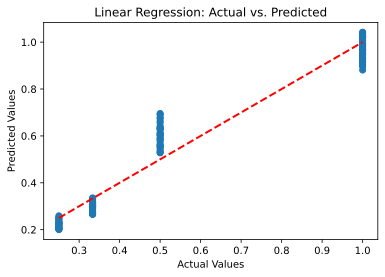

In [36]:

# Scatter plot with Regression Line
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted")
plt.show()

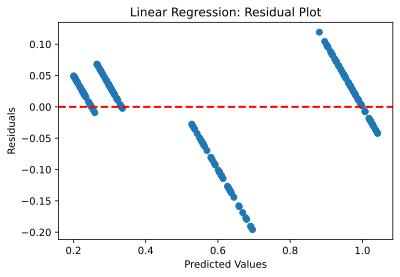

In [37]:
# Residual Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Linear Regression: Residual Plot")
plt.show()

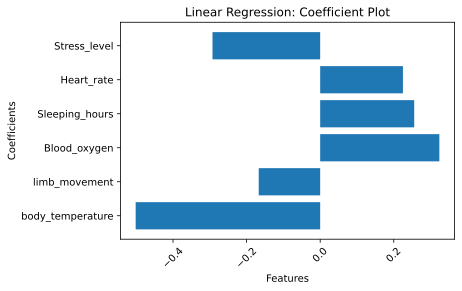

In [38]:
# Coefficient Plot
coef_names = X_train.columns  # Assuming you have column names for features
coefficients = model_lr.coef_
plt.barh(coef_names, coefficients)
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Linear Regression: Coefficient Plot")
plt.xticks(rotation=45)
plt.show()

In [39]:
from sklearn.tree import DecisionTreeRegressor 
from xgboost import XGBRegressor

# Create and train the Decision Tree Regressor 
dt_regressor = DecisionTreeRegressor(random_state=42) 
dt_regressor.fit(X_train_scaled, y_train) 


DecisionTreeRegressor(random_state=42)

In [40]:
# Make predictions on the test set using Decision Tree Regressor  
y_pred_dt = dt_regressor.predict(X_test_scaled) 

In [41]:
# Calculate R-squared score for Decision Tree Regressor 
r2_dt = r2_score(y_test, y_pred_dt) 
print('Decision Tree Regressor - R-squared Score:', r2_dt) 

Decision Tree Regressor - R-squared Score: 0.9837937636820488


In [42]:
# Calculate Mean Squared Error (MSE) for Decision Tree Regressor 
mse_dt = mean_squared_error(y_test, y_pred_dt) 
print('Decision Tree Regressor - Mean Squared Error:', mse_dt) 

Decision Tree Regressor - Mean Squared Error: 0.0015822784810126582


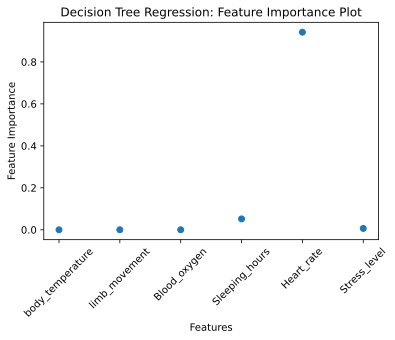

In [82]:
# Feature Importance Plot
feature_importances = dt_regressor.feature_importances_
plt.scatter(X_train_scaled.columns, feature_importances)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Decision Tree Regression: Feature Importance Plot")
plt.xticks(rotation=45)
plt.show()

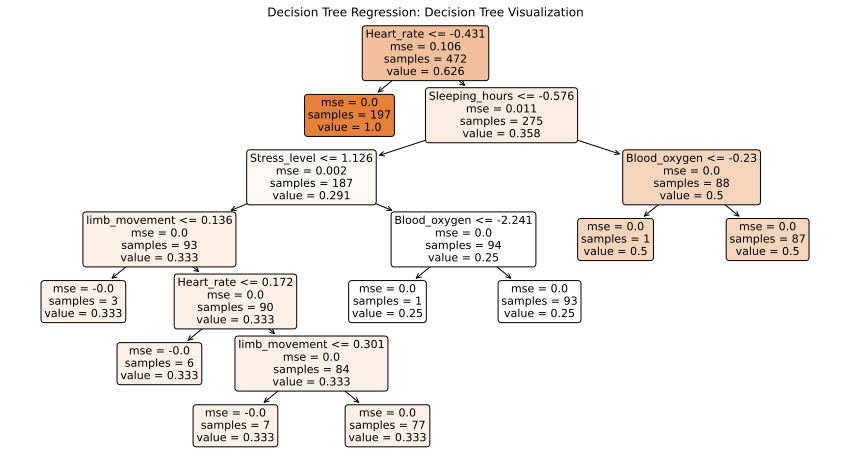

In [44]:
from sklearn.tree import plot_tree

# Decision Tree Visualization
plt.figure(figsize=(15, 8))
plot_tree(dt_regressor, feature_names=X_train_scaled.columns, filled=True, rounded=True)
plt.title("Decision Tree Regression: Decision Tree Visualization")
plt.show()

In [45]:
# Create and train the XGBoost Regressor 
xgb_regressor = XGBRegressor(random_state=42) 
xgb_regressor.fit(X_train_scaled, y_train) 

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=64,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
# Make predictions on the test set using XGBoost Regressor 
y_pred_xgb = xgb_regressor.predict(X_test_scaled) 


In [47]:
# Calculate R-squared score for XGBoost Regressor 
r2_xgb = r2_score(y_test, y_pred_xgb) 
print('XGBoost Regressor - R-squared Score:', r2_xgb) 
# Calculate Mean Squared Error (MSE) for XGBoost Regressor 
mse_xgb = mean_squared_error(y_test, y_pred_xgb) 
print('XGBoost Regressor - Mean Squared Error:', mse_xgb)

XGBoost Regressor - R-squared Score: 0.9833494376982544
XGBoost Regressor - Mean Squared Error: 0.0016256597713332206


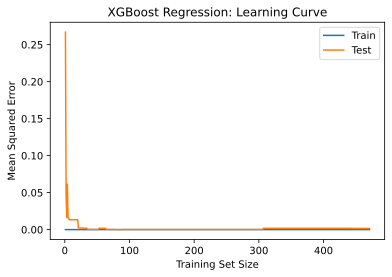

In [48]:
# Learning Curve
train_errors, test_errors = [], []
for i in range(1, len(X_train)):
    xgb_regressor.fit(X_train[:i], y_train[:i])
    y_train_pred = xgb_regressor.predict(X_train[:i])
    y_test_pred = xgb_regressor.predict(X_test)
    train_errors.append(mean_squared_error(y_train[:i], y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.plot(range(1, len(X_train)), train_errors, label='Train')
plt.plot(range(1, len(X_train)), test_errors, label='Test')
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("XGBoost Regression: Learning Curve")
plt.legend()
plt.show()

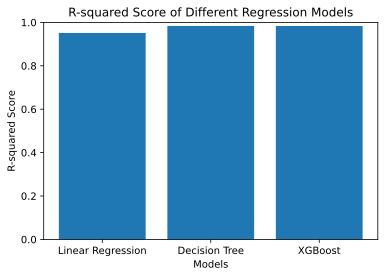

In [49]:
# Plot R-squared scores
models = ['Linear Regression', 'Decision Tree', 'XGBoost']
r2_scores = [r2_lr, r2_dt, r2_xgb]

plt.bar(models, r2_scores)
plt.xlabel("Models")
plt.ylabel("R-squared Score")
plt.title("R-squared Score of Different Regression Models")
plt.ylim(0, 1)  # R-squared scores are between 0 and 1
plt.show()

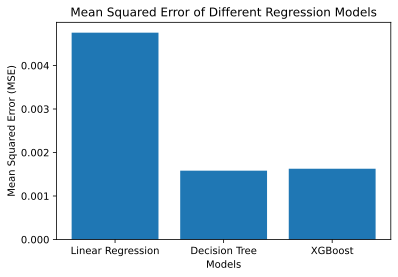

In [50]:
# Plot Mean Squared Error (MSE) scores
mse_scores = [mse, mse_dt, mse_xgb]

plt.bar(models, mse_scores)
plt.xlabel("Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Mean Squared Error of Different Regression Models")
plt.show()

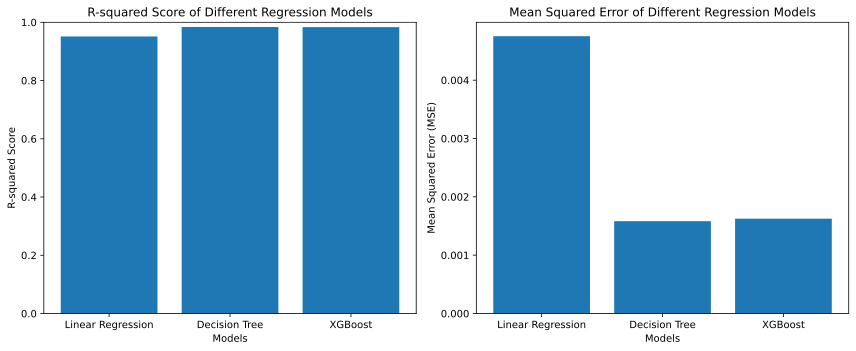

In [51]:
# Plot R-squared scores and MSE scores side by side
models = ['Linear Regression', 'Decision Tree', 'XGBoost']
r2_scores = [r2_lr, r2_dt, r2_xgb]
mse_scores = [mse, mse_dt, mse_xgb]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# R-squared scores subplot
ax1.bar(models, r2_scores)
ax1.set_xlabel("Models")
ax1.set_ylabel("R-squared Score")
ax1.set_title("R-squared Score of Different Regression Models")
ax1.set_ylim(0, 1)  # R-squared scores are between 0 and 1

# MSE scores subplot
ax2.bar(models, mse_scores)
ax2.set_xlabel("Models")
ax2.set_ylabel("Mean Squared Error (MSE)")
ax2.set_title("Mean Squared Error of Different Regression Models")

plt.tight_layout()
plt.show()

In [52]:
# converter = tf.lite.TFLiteConverter.from_keras_model(dt_regressor)
# tflite_model = converter.convert()

# with open("model.tflite", 'wb') as f:
#     f.write(tflite_model)

In [66]:
y_pred = model_lr.predict([[92.960,10.960,90.960,3.440,62.40,2]])
y_pred

array([-4.03431039])

In [79]:
y_pred_dt = (dt_regressor.predict([[92.960,10.960,90.960,3.440,62.40,2]]))*100
y_pred_dt


array([50.])

In [80]:
print(y_pred_dt)

[50.]


In [ ]:
# Creatring API for public URL

from flask_ngrok import run_with_ngrok
from flask import Flask,jsonify

app = Flask(__name__)
run_with_ngrok(app)  # start with ngrok when app is running
@app.route("/<float:body_temperature>/<float: limb_movement>/<float:Blood_oxygen>/<int:Sleeping_hours>/<Heart_rate>/<Stress_level>")   #Format in type of data giving for prewdiction
def home(body_temperature, limb_movement,blood_oxygen,sleeping_hours, Heart_rate,stress_level):
    p= []
    p += [body_temperature, limb_movement,blood_oxygen,sleeping_hours, Heart_rate]
    if stress_level <= 5:
        p+=[4]
    elif 6 <= stress_level < 8:
        p+=[2]
    elif 8 <= stress_level < 10:
        p+=[1]
    elif 11 <= stress_level < 16:
        p+=[3]
    else:
        p+=[4]
    arr = np.array([p,p])
    y_pred_dt = dt_regressor.predict(arr)
    
    return jsonify(y_pred_dt)

app.run()
    